<a href="https://colab.research.google.com/github/Lovejeet-Singh-31/Retail-Sales-Prediction/blob/main/Rossmann_Sales_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sales Prediction : Predicting sales of a major store chain Rossmann</u></b>

## <b> Problem Description </b>

### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

## <b> Data Description </b>

### <b>Rossmann Stores Data.csv </b> - historical data including Sales
### <b>store.csv </b> - supplemental information about the stores


### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

#**Following are the 7 major steps of building Machine Learning Model** :
#1.   Collecting Data.
#2.   Preparing the Data
#3.   Choosing a Model
#4.   Training the Model.
#5.   Evaluating the Model.
#6.   Parameter Tuning.
#7.   Making Predictions.

#First thing first importing the necessary libraries for EDA and Machine learning algorithim to train our model. 
##Following are the libraries:-

1.   NumPy
2.   Pandas
3.   Matplotlib
4.   Seaborn
5.   Scikit Learn




In [1]:
#importing necessary libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pylab
from scipy import stats
from scipy.stats import zscore
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score as r2, mean_squared_error as mse
import math
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix,classification_report

##Now we are ready to mount the google drive using following code

In [2]:
#Mounting the Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#**1.Collecting Data.**

#After mounting the gdrive we are ready to load our dataset.
we have two dataset.which is Rossmann Store data and Store data.In which we have diffrent store observations and its some information like sales store catagories etc.


In [29]:
#loading our Two Datasets
rossmann_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Retail Sales Prediction - Lovejeet Singh/Dataset/Copy of Rossmann Stores Data.csv')
store_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Retail Sales Prediction - Lovejeet Singh/Dataset/Copy of store.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


#**2.Preparing the Data**

##Now checking the shape of our DataFrames which helps to get an idea to know the number of rows and columns present in our both DataFrames.

In [30]:
#Checking the Number of rows and columns using Shape methods
rossmann_df.shape, store_df.shape

((1017209, 9), (1115, 10))

##The Rossmann_df has 1017209 number of rows and 9 columns.
##The Store_df has 1115 number of rows and 10 column. 

#Using info() method we can easily get the idea of what kind of data type and null values inside our both dataframes we have.

In [31]:
#checking the info 
rossmann_df.info(), store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assort

(None, None)

#as we can see that in our rossmann_df we have zero null values and in our Store_df we have too many null values.

##geting the total sum of null values present in each columns in our Store_df using isnull() function present in pandas library. 

In [32]:
#calculating totall null values in our store dataframe
store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

##we can see that we have 6 columns in which we have null values. so we have to find correct way to fll these null values.

##As the discription of columns shows the information.

*   CompetitionDistance - distance in meters to the nearest competitor store.

*   CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
*   Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
*   PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store.

so we observe from dataset that where the Promo2 has value equals to zero there are Nan values for these columns. That means the store which do not have promotion they have null values in promointerval , promo2sinceweek and so on.So for this purpose the best way to fill those features is to assign value equals to zero.

##Firstly we looking to treat null values in cometiondistance column by checking its distribution.

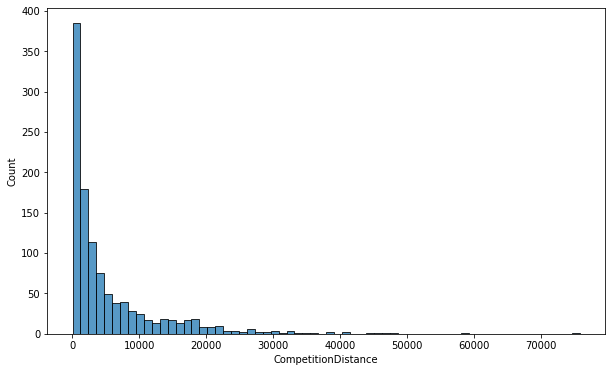

In [33]:
#checking the disribution of CompetitionDistance column
plt.figure(figsize=(10,6))
sns.histplot(store_df['CompetitionDistance'])

#as we can see that the distribution look like right skewed distribution. so we dicided to fill null values with median 

In [34]:
#replacing Nan values in CompetitionDistance with median.
store_df['CompetitionDistance'].fillna(store_df['CompetitionDistance'].median(), inplace = True)

#now the rest of the columns which has Nan values we simple put Zero as the columns descriptions shows.

In [35]:
## code for replacing Nan values with 0.


## Replacing Nan values with 0 in CompetitionOpenSinceMonth
store_df['CompetitionOpenSinceMonth'] = store_df['CompetitionOpenSinceMonth'].fillna(0)

## Replacing Nan values with 0 in CompetitionOpenSinceYear
store_df['CompetitionOpenSinceYear'] = store_df['CompetitionOpenSinceYear'].fillna(0)

## Replacing Nan values with 0 in Promo2SinceWeek
store_df['Promo2SinceWeek'] = store_df['Promo2SinceWeek'].fillna(0)

## Replacing Nan values with 0 in Promo2SinceYear
store_df['Promo2SinceYear'] = store_df['Promo2SinceYear'].fillna(0)

## Replacing Nan values with 0 in PromoInterval
store_df['PromoInterval'] = store_df['PromoInterval'].fillna(0)

#Now checking the Null values

In [36]:
## Now checking Nan values
store_df.isna().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

##Now we can see the numeric value and its aggregations like mean,mode,max and median using Describe method

In [37]:
#checking the mean mode and median in rossman_df dataset using describe function
rossmann_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [38]:
#checking the mean mode and median in store_df dataset using describe function
store_df.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000
mean,558.00000,5396.614350,4.930942,1370.939013,0.512108,12.083408,1030.239462
std,322.01708,7654.513635,4.284924,935.467654,0.500078,15.542241,1006.038782
min,1.00000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,279.50000,720.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,558.00000,2325.000000,4.000000,2006.000000,1.000000,1.000000,2009.000000
75%,836.50000,6875.000000,9.000000,2011.000000,1.000000,22.000000,2012.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


##Using head function we can get an glimps of our both dataset. 

In [39]:
#using head() function we able to view top 5 rows 
rossmann_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [40]:
#using head() function we able to view top 5 rows 
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0


#Merge the Rossmann_df and Store_df by column 'Store' as in both csv Store column is common.

In [95]:
#mearging the two dataset using pd.merge funtion.
merge_rossman_store_df = pd.merge(rossmann_df, store_df, on='Store', how='left')
merge_rossman_store_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0


In [96]:
#checking the shape
merge_rossman_store_df.shape

(1017209, 18)

#Now we have 1017209 numner of rows and 18 columns.

In [97]:
#checking the info/ datatype in our merged dataframe
merge_rossman_store_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1017209 non-null  float64
 12  CompetitionOpenSinceMonth  1017209 non-null  float64
 13  CompetitionO

#As we can see that many columns our in object datatype so we have to check the datatype of thses column because our machine learning algorithms only takes numberical values.

# first we have date column we have to separate the date, month and year from that.

In [98]:
#creating new variable date month and year from Date column 
merge_rossman_store_df['year'] = merge_rossman_store_df['Date'].apply(lambda x: x.split('-')[0])
merge_rossman_store_df['month'] = merge_rossman_store_df['Date'].apply(lambda x: x.split('-')[1])
merge_rossman_store_df['date'] = merge_rossman_store_df['Date'].apply(lambda x: x.split('-')[2])

In [99]:
merge_rossman_store_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,year,month,date
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,07,31
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,07,31
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,07,31
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0,2015,07,31
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0,2015,07,31


#So as we have catagorical values in StateHoliday so we can use pd.getdummies to create dummies variable. 

In [100]:
#calculation value counts using value_counts() funtion
merge_rossman_store_df['StateHoliday'].value_counts()

0    855087
0    131072
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

In [101]:
merge_rossman_store_df.loc[merge_rossman_store_df['StateHoliday'] == '0', 'StateHoliday'] = 0

In [102]:
merge_rossman_store_df['StateHoliday'].value_counts()

0    986159
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

In [103]:
# One hot encoding
merge_rossman_store_df = pd.get_dummies(merge_rossman_store_df, columns=["StateHoliday"],drop_first=True)

In [104]:
merge_rossman_store_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,year,month,date,StateHoliday_a,StateHoliday_b,StateHoliday_c
0,1,5,2015-07-31,5263,555,1,1,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,07,31,0,0,0
1,2,5,2015-07-31,6064,625,1,1,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,07,31,0,0,0
2,3,5,2015-07-31,8314,821,1,1,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,07,31,0,0,0
3,4,5,2015-07-31,13995,1498,1,1,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0,2015,07,31,0,0,0
4,5,5,2015-07-31,4822,559,1,1,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0,2015,07,31,0,0,0


In [105]:
merge_rossman_store_df['StateHoliday_a'].value_counts()

0    996949
1     20260
Name: StateHoliday_a, dtype: int64

#Now in Assortment column we have to levelized the catagorical value in a form of 0,1,2 which we give some weightage to model predictions.

In [106]:
merge_rossman_store_df['Assortment'].value_counts()

a    537445
c    471470
b      8294
Name: Assortment, dtype: int64

In [107]:
# code for changing Assortment dtype from object to int.
merge_rossman_store_df['Assortment'] = np.where((merge_rossman_store_df['Assortment'] == 'a'),0,merge_rossman_store_df['Assortment'])
merge_rossman_store_df['Assortment'] = np.where((merge_rossman_store_df['Assortment'] == 'b'),1,merge_rossman_store_df['Assortment'])
merge_rossman_store_df['Assortment'] = np.where((merge_rossman_store_df['Assortment'] == 'c'),2,merge_rossman_store_df['Assortment'])

#Now in StoreType we did not use One hot encoding because if we done hone encoding which give equal weightage to our model. so as per domain knowledge we can labeled as 0,1,2,3 as store type.


*   store_type 0 means small store_type.
*   store_type 1 means medium store_type.

*   store_type 2 means large store_type.
*   store_type 3 means huge store_type.





In [108]:
merge_rossman_store_df['StoreType'].value_counts()

a    551627
d    312912
c    136840
b     15830
Name: StoreType, dtype: int64

In [109]:
# code for changing StateHoliday dtype from object to int.
merge_rossman_store_df['StoreType'] = np.where((merge_rossman_store_df['StoreType'] == 'a'),0,merge_rossman_store_df['StoreType'])
merge_rossman_store_df['StoreType'] = np.where((merge_rossman_store_df['StoreType'] == 'b'),1,merge_rossman_store_df['StoreType'])
merge_rossman_store_df['StoreType'] = np.where((merge_rossman_store_df['StoreType'] == 'c'),2,merge_rossman_store_df['StoreType'])
merge_rossman_store_df['StoreType'] = np.where((merge_rossman_store_df['StoreType'] == 'd'),3,merge_rossman_store_df['StoreType'])

In [110]:
merge_rossman_store_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,year,month,date,StateHoliday_a,StateHoliday_b,StateHoliday_c
0,1,5,2015-07-31,5263,555,1,1,1,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,07,31,0,0,0
1,2,5,2015-07-31,6064,625,1,1,1,0,0,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,07,31,0,0,0
2,3,5,2015-07-31,8314,821,1,1,1,0,0,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,07,31,0,0,0
3,4,5,2015-07-31,13995,1498,1,1,1,2,2,620.0,9.0,2009.0,0,0.0,0.0,0,2015,07,31,0,0,0
4,5,5,2015-07-31,4822,559,1,1,1,0,0,29910.0,4.0,2015.0,0,0.0,0.0,0,2015,07,31,0,0,0


Some of the columns now showing when we use head().

In [111]:
pd.set_option('display.max_columns', None)

In [112]:
merge_rossman_store_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,year,month,date,StateHoliday_a,StateHoliday_b,StateHoliday_c
0,1,5,2015-07-31,5263,555,1,1,1,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,07,31,0,0,0
1,2,5,2015-07-31,6064,625,1,1,1,0,0,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,07,31,0,0,0
2,3,5,2015-07-31,8314,821,1,1,1,0,0,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,07,31,0,0,0
3,4,5,2015-07-31,13995,1498,1,1,1,2,2,620.0,9.0,2009.0,0,0.0,0.0,0,2015,07,31,0,0,0
4,5,5,2015-07-31,4822,559,1,1,1,0,0,29910.0,4.0,2015.0,0,0.0,0.0,0,2015,07,31,0,0,0


#lets check the info of our dataframe.

In [113]:
merge_rossman_store_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 23 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   SchoolHoliday              1017209 non-null  int64  
 8   StoreType                  1017209 non-null  object 
 9   Assortment                 1017209 non-null  object 
 10  CompetitionDistance        1017209 non-null  float64
 11  CompetitionOpenSinceMonth  1017209 non-null  float64
 12  CompetitionOpenSinceYear   1017209 non-null  float64
 13  Promo2      

##making a copy of our processed dataset to prevent that if we mistakenly do some change via code like inplace = true .

In [114]:
final_df = merge_rossman_store_df.copy()

#**Exploratory Data Analysis**

In [115]:
#checking the first 5 rows of our dataframe
final_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,year,month,date,StateHoliday_a,StateHoliday_b,StateHoliday_c
0,1,5,2015-07-31,5263,555,1,1,1,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,07,31,0,0,0
1,2,5,2015-07-31,6064,625,1,1,1,0,0,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,07,31,0,0,0
2,3,5,2015-07-31,8314,821,1,1,1,0,0,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,07,31,0,0,0
3,4,5,2015-07-31,13995,1498,1,1,1,2,2,620.0,9.0,2009.0,0,0.0,0.0,0,2015,07,31,0,0,0
4,5,5,2015-07-31,4822,559,1,1,1,0,0,29910.0,4.0,2015.0,0,0.0,0.0,0,2015,07,31,0,0,0


#Our Target variable is Sales so we have to check the distrubution.

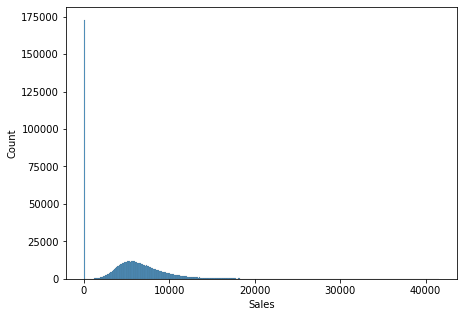

In [119]:
#checking the distribution of our taget variable
plt.figure(figsize=(7,5))
sns.histplot(final_df['Sales'])

#as we can see that our target variable 'Sales' look like normal distribution. 

#Now check the distribution of our each features

In [ ]:
#